# The scikit-learn Python Library 

[Official Documentation](https://scikit-learn.org/stable/)
***

## Overview

***

https://medium.com/district-data-labs/an-introduction-to-machine-learning-with-python-92bcaf651ac4

basic intro links on scikit: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
### Machine Learning


Supervised vs Unsupervised - iris data set https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

### Features of scikit-learn

Classification and Regression are examples of Supervised Learning
RandomForest - classification, regression

Decision Tree - classification, regression

SVC - classification

KNN - classification

Lasso - regression

Gradiant Bossing - classification

Multiple Linear - regression


**When to use each**
https://towardsdatascience.com/how-to-master-scikit-learn-for-data-science-c29214ec25b0

- What is Scikit-Learn
- Who uses it
- Why is it used
- What are the best uses cases
- What is the key functionality
- Examples of using key functionality


#### https://arxiv.org/pdf/1309.0238.pdf is API design for machine learning software: experiences from the scikit-learn project Cornell paper

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

Inspection: All specified parameter values are exposed as public attributes.

Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.


three complementary interfaces: an **estimator** (and pipelines) interface for building and fitting models, a **predictor** interface for making predictions and a **transformer** interface
for converting data. 

http://www.mostafa.rocks/2017/04/what-is-difference-between-estimators.html: What is the difference between estimators vs transformers vs predictors in sklearn? and https://stackoverflow.com/questions/54899647/what-is-the-difference-between-transformer-and-estimator-in-sklearn

You can combine building blocks of estimators, transformers and predictors as a pipeline in sklearn. This allows developers to use multiple estimators from a sequence of transformers followed by a final estimator or predictor. This concept is called composition in Machine Learning....the x and y details of fit()

Data Representation, Estimators, Predictors



Wiki - Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.


supervised vs unsupervised learning

**hyperparameters**


![Choosing the right estimator](https://scikit-learn.org/stable/_static/ml_map.png)
this is the algorithm/estimator cheat sheet

https://medium.com/district-data-labs/an-introduction-to-machine-learning-with-python-92bcaf651ac4

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
Basics of the API (https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
Choose model hyperparameters by instantiating this class with desired values.
Arrange data into a features matrix and target vector following the discussion above.
Fit the model to your data by calling the fit() method of the model instance.
Apply the Model to new data:
For supervised learning, often we predict labels for unknown data using the predict() method.
For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.
We will now step through several simple examples of applying supervised and unsupervised learning methods.





from other nb: 
#### A note on  Classification Alogorithims versus Regression Algorithms 

Classification refers to the task of giving a machine learning algorithm features, and having the algorithm put the instances/data points into one of many discrete classes. Classes are categorical in nature, it isn't possible for an instance to be classified as partially one class and partially another. A classic example of a classification task is classifying emails as either "spam" or "not spam" - there's no "a bit spammy" email.

There is an important difference between classification and regression problems.-  Fundamentally, classification is about predicting a label and regression is about predicting a quantity.
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Regressions are done when the output of the machine learning model is a real value or a continuous value. Such an example of these continuous values would be "weight" or "length". An example of a regression task is predicting the age of a person based off of features like height, weight, income, etc.








## Application
***

### Import necessary packages

In [235]:
# Packages

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

import sklearn.model_selection as mod

In [236]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

%matplotlib inline
randomstate = 1 #Provides consistent random data for training and testing. Set to 'None' if not needed

### Selection of Dataset

Consider the Iris dataset, analyzed by Ronald Fisher in 1936 which studies the size of petals and sepals of various species of the iris flower.

<img src="images/iris.svg" alt="Iris">


It's possible to download the iris dataset direct from scikit-learn as it is a built-in dataset of the package. See toy datasets at https://scikit-learn.org/stable/datasets.html: 

In [237]:
from sklearn.datasets import load_iris  #import toy dataset

# Load the iris data set from a URL.
df = load_iris(as_frame = True)['frame']

In [238]:
# Have a look at the data.
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We can also use a loaded CSV file: 

In [239]:
# Load the iris data set from a URL.
df = pd.read_csv("datasets/iris.csv")

In [240]:
# Have a look at the data.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [241]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [243]:
X_iris = df.drop('species', axis=1)
X_iris.shape

(150, 4)

In [244]:
y_iris = df['species']
y_iris.shape

(150,)

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset (150 in total). Each column of the data refers to a particular quantitative piece of information that describes each sample (4(x) + 1(y)). 

### Visualise

bit about iris here: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

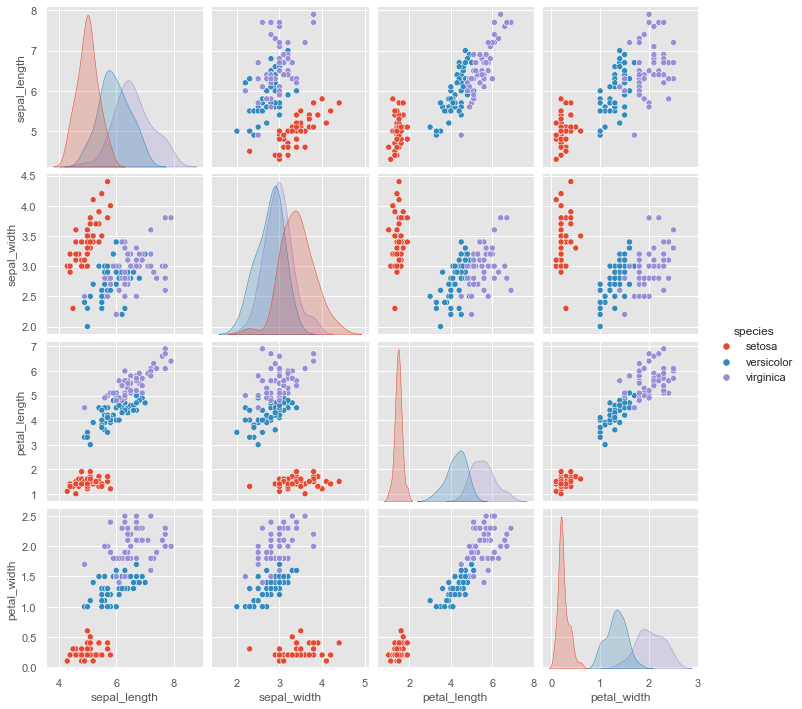

In [245]:
# seaborn pairplot of the iris dataset
sns.pairplot(df, hue="species")
plt.show()

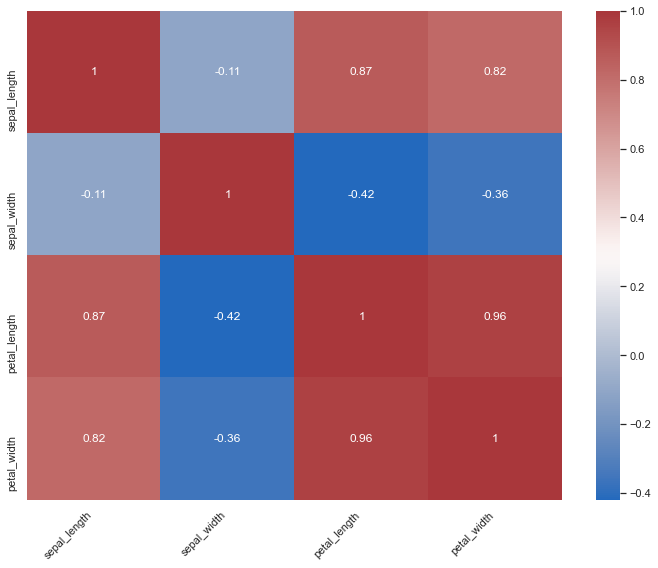

In [246]:
sns.set(rc={'figure.figsize':(12,9)}) #https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

df_corr = df.corr()

g = sns.heatmap(df_corr, cmap='vlag', annot=True)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right') #https://www.codegrepper.com/code-examples/whatever/rotate+the+x+labels+on+heatmap

plt.show()

Analysis of the correlation heatmap, table and boxplot:
- The above heatmap and the correlation tables show the correlation between each of the variables
- We can see that there is is relatively positive and higher correlaion between Glucose and Outcome (Diabetic or Not Diabetic), Age and Blood Pressure, BMI and Outcome. All these correlation are expected based on medical research. Greater Glucose levels and greater BMI have been documented to have a correlation to the higher risk of diabetes. It is also well documented that Blood Pressure increases with age.
- There is a high correlation between pregancies and age. This is an expected correlation and does not provide much insight as there it is to be expected that more pregancies mean a higher age.

### Test and Train

https://www.kaggle.com/sharmajayesh76/iris-data-train-test-split

train and test the data **2021 iris loan**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/tutorial/basic/tutorial.html: Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

In [247]:
# split the dataset into training & test data - 70% training data & 30% test data
train, test = mod.train_test_split(df, test_size=.30, random_state=0)

In [248]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
116,6.5,3.0,5.5,1.8,virginica
144,6.7,3.3,5.7,2.5,virginica
119,6.0,2.2,5.0,1.5,virginica
108,6.7,2.5,5.8,1.8,virginica


In [249]:
# The indices of the train array.
train.index

Int64Index([ 60, 116, 144, 119, 108,  69, 135,  56,  80, 123,
            ...
             88,  70,  87,  36,  21,   9, 103,  67, 117,  47],
           dtype='int64', length=105)

In [250]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [251]:
test.index.size

45

#### Visualise: Test Train Split

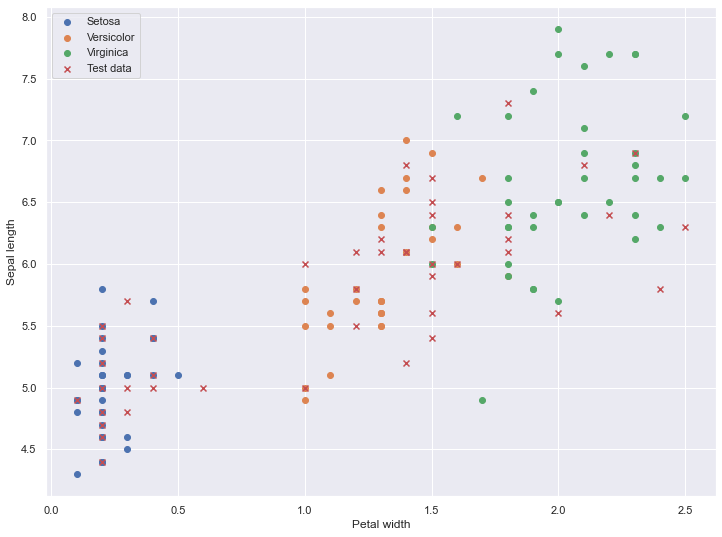

In [252]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [253]:
# define training & test features array (X)
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]

# define training & test target array (y)
y_train = train['species']
y_test = test['species']

## Three Interesting Algorithms

***


https://towardsdatascience.com/simple-way-to-find-a-suitable-algorithm-for-your-data-in-scikit-learn-python-9a9710c7c0fe

https://www.dataquest.io/blog/sci-kit-learn-tutorial/



https://scikit-learn.org/stable/supervised_learning.html

[Article discussing sci-kit alogrithms Part 1](https://medium.com/analytics-vidhya/most-used-scikit-learn-algorithms-part-1-snehit-vaddi-7ec0c98e4edd)

[Article discussing sci-kit alogrithms Part 2](https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8)

[Article discussing sci-kit alogrithms Part 3](https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-3-6fb05798acb1)




### Algorithm 1 - Decision Tree

# TEXT
https://www.educative.io/edpresso/how-to-build-a-decision-tree-with-the-iris-dataset-in-python

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

https://scikit-learn.org/stable/modules/tree.html

**Classification**
https://www.datacamp.com/community/tutorials/decision-tree-classification-python eg Pima Indian Diabetes

**Regression**
https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Decision Trees is another type of supervised machine learning algorithm where the data is continuously split according to a certain parameter.
More the data more is the accuracy of the model.
Decision trees is one of the most used algorithm out of all supervised learning algorithms and finds huge applications in the industry.



**see 2021 diabetes diet good**
**see 2021 iris diabetes**
**see 2021 iris loan**

# TEXT

Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

In [254]:
# Importing the Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Choose model hyperparameters by instantiating this class with desired values.

In [255]:
# Instantiating a decision tree.
tree_clf = DecisionTreeClassifier(random_state = 0)

Arrange data into a features matrix and target vector. Fit the model to your data by calling the fit() method of the model instance.

In [256]:
# Fitting the 2 dimensional training data
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Apply the Model to new data. For supervised learning, often we predict labels for unknown data using the predict() method.

In [257]:
# Making predictions on the 2 dimensional testing data.

predictions = tree_clf.predict(X_test)
# Compare prediction results to actual test data
print(predictions == y_test)

114     True
62      True
33      True
107     True
7       True
100     True
40      True
86      True
76      True
71      True
134     True
51      True
73      True
54      True
63      True
37      True
78      True
90      True
45      True
16      True
121     True
66      True
24      True
8       True
126     True
22      True
44      True
97      True
93      True
26      True
137     True
84      True
27      True
127     True
132     True
59      True
18      True
83     False
61      True
92      True
112     True
2       True
141     True
43      True
10      True
Name: species, dtype: bool


In [258]:
# Calculating and printing the accuracy.
tree_accuracy = tree_clf.score(X_test, y_test)

In [259]:
print("Incorrect prediction = ", predictions[(predictions == y_test) == False])

#tree_accuracy = accuracy_score(y_test, tree_predictions)

print(f"The default Decision Tree model had a classification accuracy of {(tree_accuracy*100):.1f}%")
#print("\nThe Confusion Matrix for this model is:\n", confusion_matrix(y_test, tree_predictions))


Incorrect prediction =  ['virginica']
The default Decision Tree model had a classification accuracy of 97.8%


In [260]:
# Show the misclassified data.
misclass = test[predictions != y_test]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

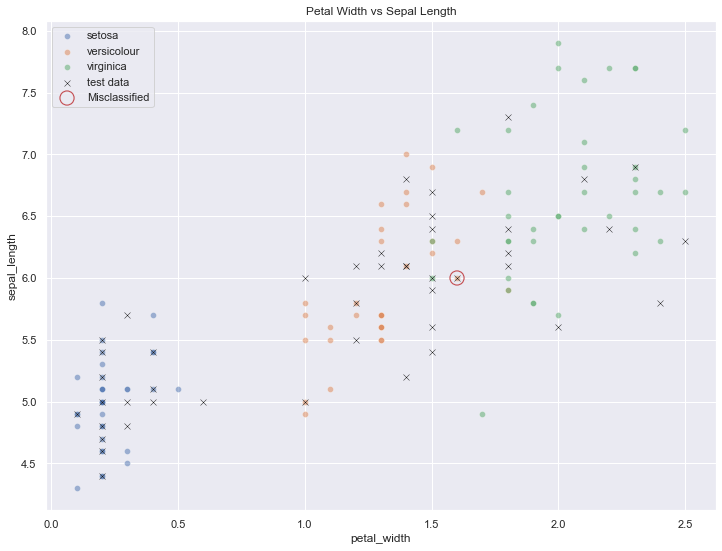

In [261]:
# Plotting the training & test data - Petal Length vs Petal Width

# training data
sns.scatterplot(setos['petal_width'], setos['sepal_length'], label='setosa', alpha=0.5)
sns.scatterplot(versi['petal_width'], versi['sepal_length'], label='versicolour', alpha=0.5)
sns.scatterplot(virgi['petal_width'], virgi['sepal_length'], label='virginica', alpha=0.5)

# test data
sns.scatterplot(test['petal_width'], test['sepal_length'], marker='x', label='test data', color='k')
sns.scatterplot(misclass['petal_width'], misclass['sepal_length'],s=200, facecolor='none', edgecolor='r', label='Misclassified')

plt.title("Petal Width vs Sepal Length")
plt.show()

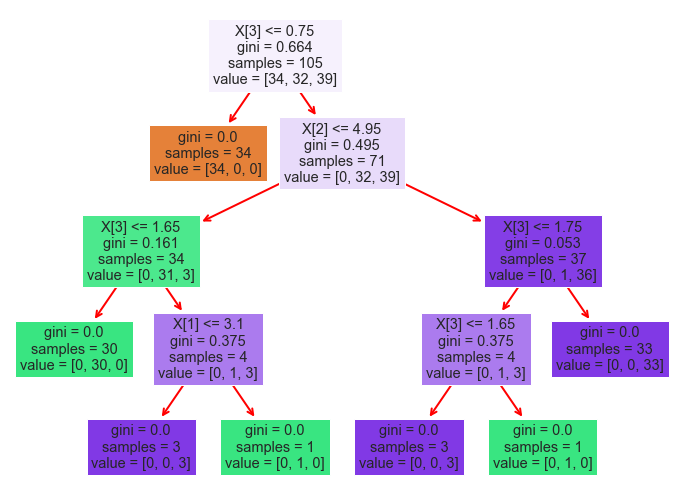

In [262]:
# Set figure size
fig = plt.figure(figsize=(12,9))

decision_tree = tree.plot_tree(tree_clf, filled=True)

# decision tree arrow display
for ele in decision_tree:
    arrow = ele.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(2)

plt.show()

In [263]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

### Algorithm 2 - RandomForest

# TEXT
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-learn-scikit-learn-for-data-science/
https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

https://www.datacamp.com/community/tutorials/random-forests-classifier-python: iris

#### Summary
#### Advantages and Disadvantages
#### Features

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial


https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Another powerful machine learning algorithm that produces great result even without hyper-parameter tuning.
It is also one of the most used algorithms, because of its simplicity and the fact that it can be used for both classification and regression tasks.

Part 1 of above article...very detailed: Random forest is a supervised ensemble learning algorithm that is used for both classifications as well as regression problems. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees mean more robust forests. Similarly, the random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.
It is an ensemble method that is better than a single decision tree because it reduces the over-fitting by averaging the result.

**see 2021 iris diabetes**
**see 2021 iris loan**
# TEXT

In [264]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
pred = clf.predict([[2., 3.]])
print(pred)

[1]


Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

In [265]:
# https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset
# Importing the Random Forest Classifier
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier

Choose model hyperparameters by instantiating this class with desired values.

In [273]:
# Instantiating a Random Forest Classifier. 
forest_clf = RandomForestClassifier(n_estimators=100)

Arrange data into a features matrix and target vector. Fit the model to your data by calling the fit() method of the model instance.

In [267]:
# Fitting the 2 dimensional training data
forest_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

Apply the Model to new data. For supervised learning, often we predict labels for unknown data using the predict() method.

In [268]:
# Making predictions on the 2 dimensional testing data.

forest_predictions = forest_clf.predict(X_test)
# Compare prediction results to actual test data
print(forest_predictions == y_test)

114     True
62      True
33      True
107     True
7       True
100     True
40      True
86      True
76      True
71      True
134     True
51      True
73      True
54      True
63      True
37      True
78      True
90      True
45      True
16      True
121     True
66      True
24      True
8       True
126     True
22      True
44      True
97      True
93      True
26      True
137     True
84      True
27      True
127     True
132     True
59      True
18      True
83     False
61      True
92      True
112     True
2       True
141     True
43      True
10      True
Name: species, dtype: bool


In [269]:
# Calculating and printing the accuracy.
forest_accuracy = forest_clf.score(X_test, y_test)

from sklearn.metrics import confusion_matrix
forest_matrix = confusion_matrix(y_test, forest_predictions)

print("Incorrect prediction = ", forest_predictions[(forest_predictions == y_test) == False])

print(f"The default Decision Tree model had a classification accuracy of {(forest_accuracy*100):.1f}%")

print(f"\nThe default Random Forest model Confusion Matrix:\n{forest_matrix}")

Incorrect prediction =  ['virginica']
The default Decision Tree model had a classification accuracy of 97.8%

The default Random Forest model Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]






<img src="images/3x3 confusion matrix.png" alt="3x3 confusion matrix" width="500"/>

In [270]:
# Show the misclassified data.
misclass = test[predictions != y_test]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

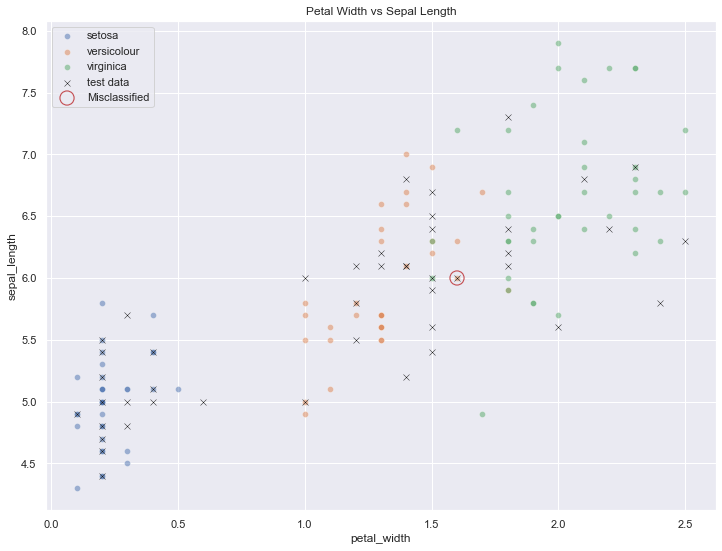

In [271]:
# Plotting the training & test data - Petal Length vs Petal Width

# training data
sns.scatterplot(setos['petal_width'], setos['sepal_length'], label='setosa', alpha=0.5)
sns.scatterplot(versi['petal_width'], versi['sepal_length'], label='versicolour', alpha=0.5)
sns.scatterplot(virgi['petal_width'], virgi['sepal_length'], label='virginica', alpha=0.5)

# test data
sns.scatterplot(test['petal_width'], test['sepal_length'], marker='x', label='test data', color='k')
sns.scatterplot(misclass['petal_width'], misclass['sepal_length'],s=200, facecolor='none', edgecolor='r', label='Misclassified')

plt.title("Petal Width vs Sepal Length")
plt.show()

In [272]:
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# need to upload graphiz
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

#### Decision Tree vs Random Forest

https://www.datacamp.com/community/tutorials/random-forests-classifier-python#comparison

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial#5

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
Decision Tree vs. Random Forest 

https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn

### Algorithm 3 - Support Vector Machines 


Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
Choose model hyperparameters by instantiating this class with desired values.
Arrange data into a features matrix and target vector following the discussion above.
Fit the model to your data by calling the fit() method of the model instance.
Apply the Model to new data:
For supervised learning, often we predict labels for unknown data using the predict() method.
For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

https://www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python: e.g. breast cancer
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
https://www.kaggle.com/moghazy/classifying-the-iris-dataset-using-svms
#### Summary
#### How does it work
#### Tuning Hyperparameters
#### Advantages and Disadvantages

SVM supervised

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Support Vector Machines(SVM) are among one of the most popular and talked about machine learning algorithms. SVM can be used for both Classification and Regression.
The main objective of SVM is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. SVM cannot be applied to the majority of large datasets since the classes must be separated by a boundary that should be linear. Detailed Explanation here.


see 2021 diabetes diet good

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_test)

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix





In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]] # dataset
y = [0, 1]
clf = svm.SVC() # classifier is created
clf.fit(X, y) # fitting classifier on dataset
OUTPUT : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Random Forest vs SVM

https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
Comparative Study on Classic Machine learning Algorithms 


https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa

https://medium.com/@dannymvarghese/comparative-study-on-classic-machine-learning-algorithms-part-2-5ab58b683ec0

## Conclusion
***

## References
***

[1]: https://scikit-learn.org/stable/ - look at ways to reference with footnotes in markdown)

[2] https://en.wikipedia.org/wiki/Scikit-learn

***
## End